In [1]:
import h5py
import numpy as np
import pandas as pd
import phenograph
import time
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn import manifold
%matplotlib inline
import shogun
from shogun import MultidimensionalScaling, RealFeatures, Isomap, StochasticProximityEmbedding
from sklearn.manifold import TSNE

/cluster/work/bewi/members/tuncel/anaconda3/envs/r-3.4.1-env/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
input_file = '/cluster/home/mtuncel/sc-pipe/simulated/9_groups/melanomaS2_sim_loc1.5_zheng17.h5'

In [3]:
h5f = h5py.File(input_file, 'r')

In [4]:
list(h5f['cell_attrs'].keys())

['cell_groups', 'cell_names', 'cells_on_rows']

In [5]:
h5f = h5py.File(input_file, 'r')
matrix = h5f['matrix'][:]
barcodes = h5f['cell_attrs']['cell_names'].value
cell_groups = h5f['cell_attrs']['cell_groups'].value
h5f.close()
matrix = np.log1p(matrix)

In [6]:
matrix.shape

(2495, 999)

### Phenograph

In [7]:
time.time()

1520264409.9959092

In [8]:
current = time.time()
communities, graph, Q = phenograph.cluster(matrix, n_jobs=12, k=100, primary_metric='euclidean')
end = time.time()
diff = end - current

Finding 100 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 1.471747875213623 seconds
Jaccard graph constructed in 0.8944218158721924 seconds
Wrote graph to binary file in 0.49741363525390625 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.770248
Louvain completed 21 runs in 1.03131103515625 seconds
PhenoGraph complete in 3.937940835952759 seconds


In [9]:
arr = graph.toarray()

In [10]:
arr_full = arr+arr.T

In [11]:
arr.max()

0.7391304347826086

In [12]:
arr_full

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.17114094],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.17114094, 0.        ,
        0.        ]])

In [13]:
np.fill_diagonal(arr_full, 1)

In [14]:
dist = (arr_full- arr_full.max())*(-1)

In [15]:
np.fill_diagonal(dist, 0)

In [16]:
dist

array([[0.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 0.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 0.        , 1.        ,
        0.82885906],
       [1.        , 1.        , 1.        , ..., 1.        , 0.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 0.82885906, 1.        ,
        0.        ]])

In [20]:
# does not have much impact on the results
#dist = np.log1p(dist)

In [21]:
np.sum(dist)

4267354.802938094

In [76]:
dist_df = pd.DataFrame(dist)

In [77]:
dist_df

,0,1,2,3,4,5,6,7,8,9,...,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494
0,0.000000e+00,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.425581e-07,1.629235e-07,...,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07
1,1.629235e-07,0.000000e+00,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,...,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.343018e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07
2,1.629235e-07,1.629235e-07,0.000000e+00,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,...,1.629235e-07,9.956437e-08,1.629235e-07,1.629235e-07,1.523381e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07
3,1.629235e-07,1.629235e-07,1.629235e-07,0.000000e+00,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,...,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07
4,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,0.000000e+00,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,...,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.245886e-07,1.245886e-07,1.629235e-07,1.629235e-07,1.629235e-07
5,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,0.000000e+00,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,...,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07
6,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,0.000000e+00,1.629235e-07,1.629235e-07,1.629235e-07,...,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.352932e-07,1.364889e-07,1.548669e-07
7,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,0.000000e+00,1.629235e-07,1.629235e-07,...,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07
8,1.425581e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,0.000000e+00,1.629235e-07,...,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07
9,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,0.000000e+00,...,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07,1.629235e-07


In [68]:
#dist_df.to_csv('distance_matrix.csv')

In [28]:
def apply_mds(distance, max_iter, eps=1e-3, n_init=1):
    mds = manifold.MDS(2, max_iter=max_iter, eps=eps, n_init=n_init, dissimilarity='precomputed', n_jobs=12)
    trans_data = mds.fit_transform(distance)
    df = pd.DataFrame(trans_data)
    df['cluster'] = communities
    return df

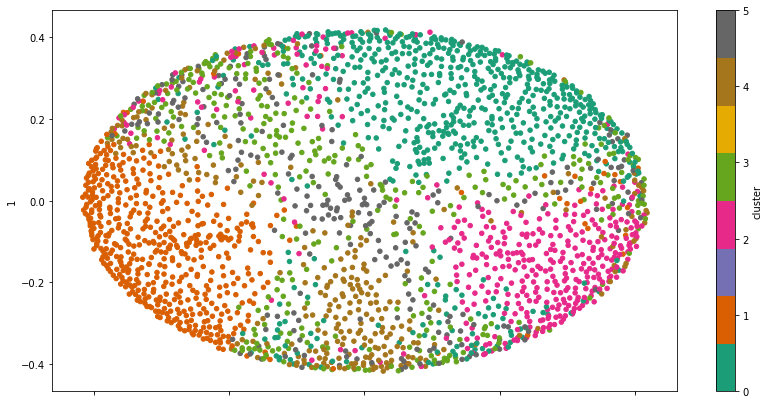

In [22]:
df = apply_mds(dist, 3000)
df.plot(kind='scatter', x=0, y=1, c='cluster', figsize=(14,7),colormap='Dark2')

In [43]:
tsne = TSNE(n_components=2, perplexity= 70,metric='precomputed').fit_transform(dist)

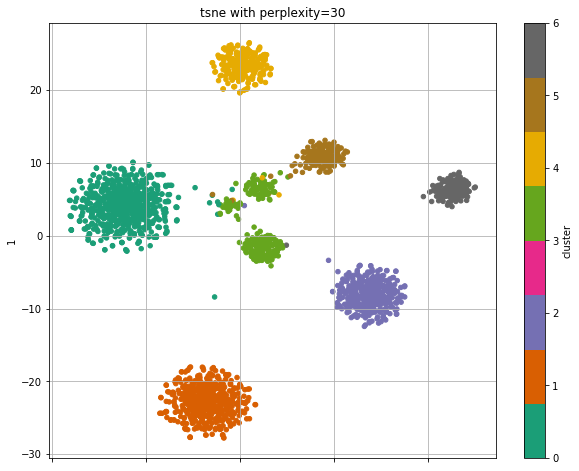

In [44]:

df_tsne = pd.DataFrame(tsne)
df_tsne['cluster'] = communities
df_tsne['ground_truth'] = cell_groups
df_tsne['ground_truth'] = df_tsne['ground_truth'].apply(lambda x: int(str(x, 'utf-8')[-1]))
df_tsne.plot(kind='scatter', x=0, y=1, c='cluster', figsize=(10,8),colormap='Dark2', grid=True, title='tsne with perplexity=30')

In [24]:
tsne = TSNE(n_components=2, perplexity= 200,metric='precomputed').fit_transform(dist)

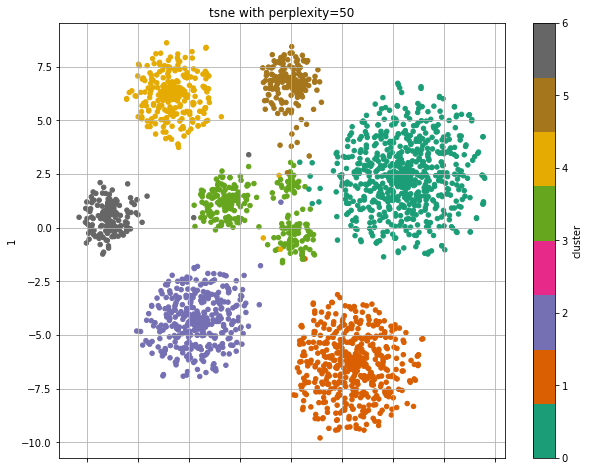

In [25]:
df_tsne = pd.DataFrame(tsne)
df_tsne['cluster'] = communities
df_tsne['ground_truth'] = cell_groups
df_tsne['ground_truth'] = df_tsne['ground_truth'].apply(lambda x: int(str(x, 'utf-8')[-1]))
df_tsne.plot(kind='scatter', x=0, y=1, c='cluster', figsize=(10,8),colormap='Dark2', grid=True, title='tsne with perplexity=50')

In [106]:
dist.max()

0.7391304347826086

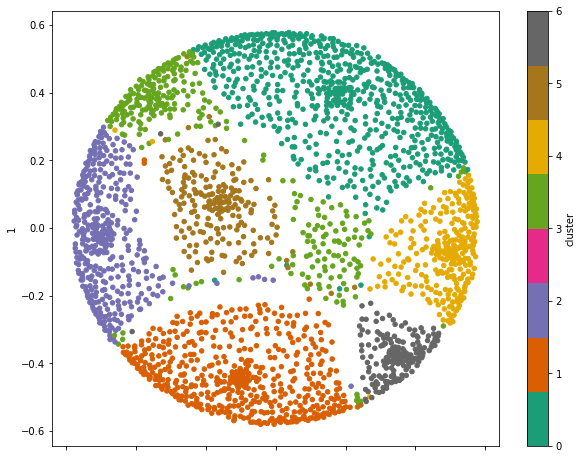

In [97]:
df = apply_mds(dist, 3000)
df.plot(kind='scatter', x=0, y=1, c='cluster', figsize=(10,8),colormap='Dark2', grid=True)

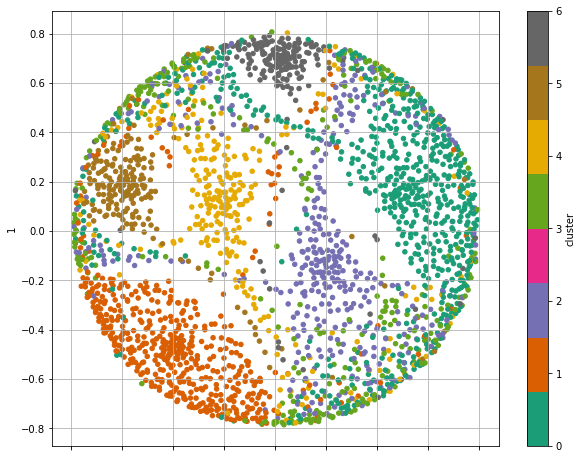

In [29]:
df2 = apply_mds(dist, 300)
df2.plot(kind='scatter', x=0, y=1, c='cluster', figsize=(10,8),colormap='Dark2', grid=True)

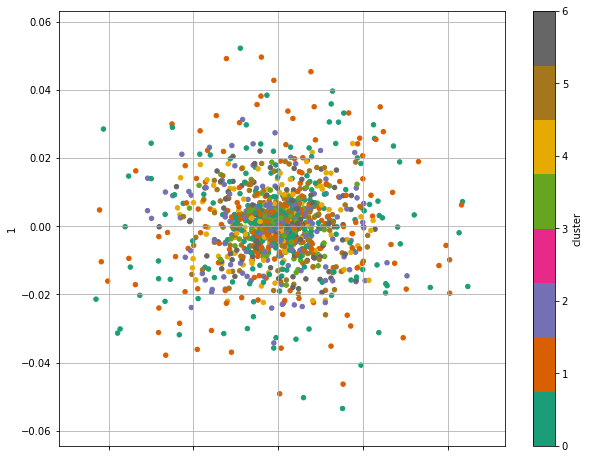

In [115]:
apply_mds(dist2, 300).plot(kind='scatter', x=0, y=1, c='cluster', figsize=(10,8),colormap='Dark2', grid=True)

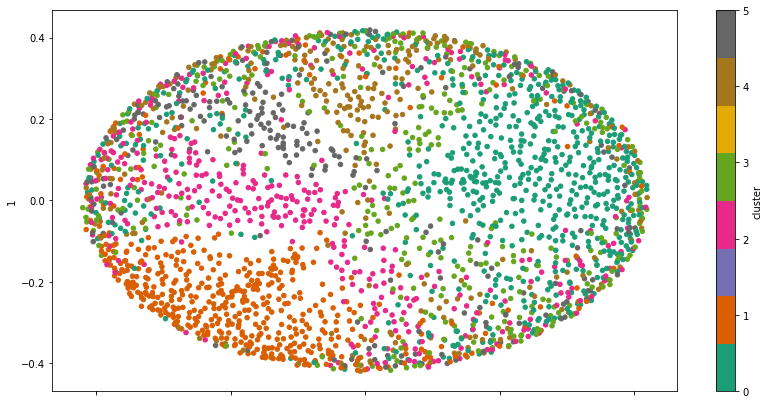

In [44]:
df2 = apply_mds(dist, max_iter=500, n_init=8)
df2.plot(kind='scatter', x=0, y=1, c='cluster', figsize=(14,7),colormap='Dark2')

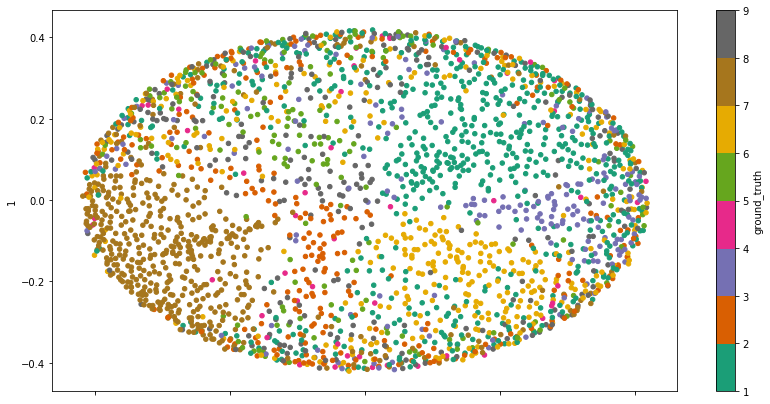

In [40]:
df2['ground_truth'] = cell_groups
df2['ground_truth'] = df2['ground_truth'].apply(lambda x: int(str(x, 'utf-8')[-1]))
df2.plot(kind='scatter', x=0, y=1, c='ground_truth', figsize=(14,7),colormap='Dark2')

### Shogun implementation test

In [66]:
dist.shape

(2495, 2495)

In [67]:
features = RealFeatures(dist)

# create instance of Isomap converter and configure it
#isomap = Isomap()
#isomap.set_target_dim(2)
# set the number of neighbours used in kNN search
#isomap.set_k(20)

# create instance of Multidimensional Scaling converter and configure it
mds = MultidimensionalScaling()
mds.set_target_dim(2)

# embed Swiss roll data
embedded_data_mds = mds.embed(features).get_feature_matrix()
#embedded_data_isomap = isomap.embed(features).get_feature_matrix()

In [ ]:
# create MDS instance
converter = StochasticProximityEmbedding()
converter.set_target_dim(2)

# embed helix data
embedded_features = converter.embed(features)
embedded_data_spe = embedded_features.get_feature_matrix()

In [94]:
embedded_data_isomap.shape

(2, 2495)

In [90]:
embedded_data_mds.shape

(2, 2495)

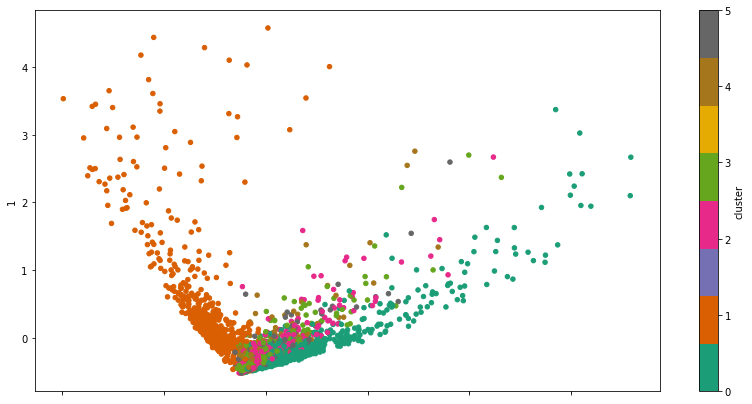

In [68]:
df_shogun = pd.DataFrame(embedded_data_mds.T)
df_shogun['cluster'] = communities
df_shogun.plot(kind='scatter', x=0, y=1, c='cluster', figsize=(14,7),colormap='Dark2')

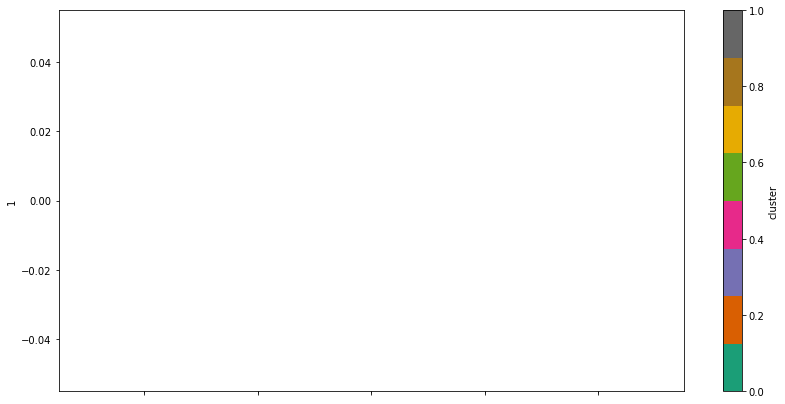

In [95]:
df_iso = pd.DataFrame(embedded_data_isomap.T)
df_iso['cluster'] = communities
df_iso.plot(kind='scatter', x=0, y=1, c='cluster', figsize=(14,7),colormap='Dark2')

In [ ]:
df_spe = pd.DataFrame(embedded_data_spe.T)
df_spe['cluster'] = communities
df_spe.plot(kind='scatter', x=0, y=1, c='cluster', figsize=(14,7),colormap='Dark2')

In [18]:
communities.shape

(2495,)

In [71]:
from collections import Counter
Counter(communities)

Counter({0: 680, 1: 525, 2: 398, 3: 360, 4: 293, 5: 239})

In [76]:
cg = Counter(cell_groups)

In [80]:
cg

Counter({b'Group1': 646,
         b'Group2': 275,
         b'Group3': 193,
         b'Group4': 51,
         b'Group5': 179,
         b'Group6': 375,
         b'Group7': 508,
         b'Group8': 105,
         b'Group9': 163})

In [77]:
type(cg)

collections.Counter

In [78]:
df = pd.DataFrame.from_dict(cg, orient='index').reset_index()

In [79]:
df

,index,0
0,b'Group1',646
1,b'Group2',275
2,b'Group3',193
3,b'Group7',508
4,b'Group9',163
5,b'Group6',375
6,b'Group4',51
7,b'Group5',179
8,b'Group8',105


In [1]:
len(communities)==len(cell_groups)

NameError: name 'communities' is not defined

In [22]:
dense_graph = graph.todense()

In [23]:
print(normalized_mutual_info_score(cell_groups, communities))

0.7643456546751677
